# Python Pandas Screaming Frog notebook

Analyzing a Screaming Frog crawl with Python Pandas and a bunch of other stuff.  
Check out [this article](https://www.databulle.com/blog/code/crawl-analysis-in-python.html) for more info.  

You'll need two exports from Screaming Frog:  
- internal_all.csv  
- all_outlinks.csv  

You'll also need some dependencies: simply run `pip install -r requirements.txt` to install.  

<br />
<br />
Let's import some useful libraries.

In [1]:
import pandas as pd

# Display plots directly in the notebook
%matplotlib inline 

We can now import our crawl data directly in two Pandas dataframes:  
- one (`urls`) for URLs data,  
- and the second (`links`) for links.  


In [2]:
# We skip the first row with `skiprows`, and
# load only useful data with `usecols` argument.
urls = pd.read_csv('data/internal_all.csv',skiprows=1,
                   usecols=["Address","Status Code","Status",
                            "Title 1","Meta Description 1","H1-1","H1-2","Meta Robots 1",
                            "Meta Refresh 1","Canonical Link Element 1","Word Count","Text Ratio",
                            "Crawl Depth","Inlinks","Unique Inlinks","Outlinks","Unique Outlinks",
                            "External Outlinks","Unique External Outlinks","Redirect URI"])
urls.head() # show the first rows of the dataframe: helpful to check if all went right.

,Address,Status Code,Status,Title 1,Meta Description 1,H1-1,H1-2,Meta Robots 1,Meta Refresh 1,Canonical Link Element 1,Word Count,Text Ratio,Crawl Depth,Inlinks,Unique Inlinks,Outlinks,Unique Outlinks,External Outlinks,Unique External Outlinks,Redirect URI
0,https://www.python.org/dev/peps/pep-0470,301,MOVED PERMANENTLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,3,3,2,0,0,0,0,https://www.python.org/dev/peps/pep-0470/
1,https://www.python.org/events/python-user-grou...,200,OK,Django Girls Ibagué | Python.org,The official home of the Python Programming La...,NaN,Django Girls Ibagué,NaN,NaN,NaN,335,6.423675,2,23,15,113,45,35,22,NaN
2,https://www.python.org/dev/peps/pep-0471,301,MOVED PERMANENTLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,3,5,2,0,0,0,0,https://www.python.org/dev/peps/pep-0471/
3,https://www.python.org/m/files/f990-2001.pdf,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,3,1,1,0,0,0,0,NaN
4,https://www.python.org/ftp/python/3.5.0/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,2,2,2,0,0,0,0,NaN


In [3]:
# Same thing for the links
links = pd.read_csv('data/all_outlinks.csv',skiprows=1,usecols=["Type","Source","Destination","Status Code"])
links.head()

,Type,Source,Destination,Status Code
0,REDIRECT,https://www.python.org/dev/peps/pep-0470,https://www.python.org/dev/peps/pep-0470/,200.0
1,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/events/python-user-grou...,200.0
2,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/events/python-user-grou...,200.0
3,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/,200.0
4,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/psf-landing/,200.0


<br/>
<br/>
## Simple grouping and charts

We can now play a little with the data.  
Let's count URLs per Status Code:  

In [4]:
# Status Code pie chart
urls.groupby('Status Code')['Status Code'].count()

Status Code
200    3202
301     467
302       3
307     449
404     239
Name: Status Code, dtype: int64

This is nice, but ugly.  
However, Pandas DataFrames have a very helpful [`plot()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) function.  

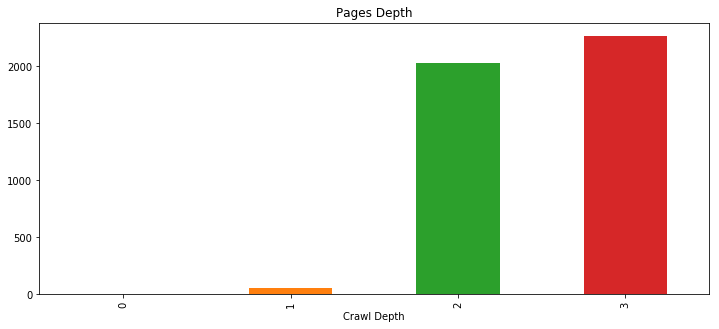

In [5]:
# Depth bar chart
urls.groupby('Crawl Depth')['Crawl Depth'].count().plot(kind="bar", figsize=(12,5), title='Pages Depth')

You might want to save this kind of chart to a file. Here's how:  

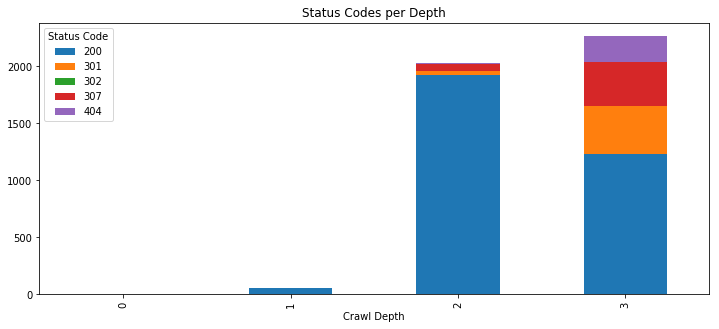

In [6]:
ax = urls.groupby(['Crawl Depth','Status Code'])['Crawl Depth'].count().unstack().plot(kind="bar", figsize=(12,5), title='Status Codes per Depth', stacked=True)
fig = ax.get_figure()
fig.savefig('output/pic.png')

<br/>
<br/>
## Filtering and exporting
Using some built-in filter functionnalities we can access to specific data.  
Example: filtering `links` to find any external link.  
`~` is the "not" symbol for filters:

In [7]:
links[~links['Destination'].str.contains('^https://www.python.org')].head(10)

,Type,Source,Destination,Status Code
31,AHREF,https://www.python.org/events/python-user-grou...,http://python.org/dev/peps/,301.0
77,AHREF,https://www.python.org/events/python-user-grou...,http://python.org/dev/peps/,301.0
114,AHREF,https://www.python.org/events/python-user-grou...,https://docs.python.org/,NaN
115,AHREF,https://www.python.org/events/python-user-grou...,https://pypi.python.org/,NaN
116,AHREF,https://www.python.org/events/python-user-grou...,http://plus.google.com/+Python,NaN
117,AHREF,https://www.python.org/events/python-user-grou...,http://www.facebook.com/pythonlang?fref=ts,NaN
118,AHREF,https://www.python.org/events/python-user-grou...,http://twitter.com/ThePSF,NaN
119,AHREF,https://www.python.org/events/python-user-grou...,http://brochure.getpython.info/,NaN
120,AHREF,https://www.python.org/events/python-user-grou...,https://docs.python.org/3/license.html,NaN
121,AHREF,https://www.python.org/events/python-user-grou...,https://wiki.python.org/moin/BeginnersGuide,NaN


The `to_csv()` function exports data to CSV files on the go.  

In [8]:
# Export broken links to CSV
links[links["Status Code"] == 404].to_csv('output/404-links.csv')

You can also try more complex filters. For example, let's select URLs without a Title but still responding in HTTP 200:

In [9]:
urls[(urls["Title 1"].isnull()) & (urls["Status Code"] == 200)].head(10)

,Address,Status Code,Status,Title 1,Meta Description 1,H1-1,H1-2,Meta Robots 1,Meta Refresh 1,Canonical Link Element 1,Word Count,Text Ratio,Crawl Depth,Inlinks,Unique Inlinks,Outlinks,Unique Outlinks,External Outlinks,Unique External Outlinks,Redirect URI
3,https://www.python.org/m/files/f990-2001.pdf,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,3,1,1,0,0,0,0,NaN
4,https://www.python.org/ftp/python/3.5.0/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN
7,https://www.python.org/ftp/python/3.6.1/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN
10,https://www.python.org/ftp/python/3.4.4/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN
13,https://www.python.org/ftp/python/2.1.3/Python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,3,3,0,0,0,0,NaN
14,https://www.python.org/ftp/python/3.6.0/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN
15,https://www.python.org/ftp/python/3.7.0/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN
17,https://www.python.org/ftp/python/2.7.2/Python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN
19,https://www.python.org/ftp/python/2.7.13/pytho...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,3,1,1,0,0,0,0,NaN
22,https://www.python.org/ftp/python/3.4.2/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,2,2,2,0,0,0,0,NaN


<br/>
<br/>

## Data enhancement

Several Pandas DataFrames can be merged together, which is very helpful when you want to add external data to enhance your analysis.

For example, we can use our [categorize script](https://gitlab.com/databulle/categorize) to associate each crawled URL with its category.  

__Step 1:__ save URLs to a new file.

In [10]:
# Save URLs to file
urls['Address'].to_csv('data/urls.csv', index=None)

__Step 2:__ use the script to categorize URLs, and save results as `categorized.csv`.  
See [our blog](https://www.databulle.com/blog/code/categorize.html) for more details on how to use this script.  

__Step 3:__ load categorized URLs into our DataFrame.  

We'll create a new DataFrame (`cats`) in which we'll load our categorized URLs.  
Then, using the `merge()` function we'll add this newly generated data to our original `urls` DataFrame.  
`merge()` works a lot like joins in SQL, but you'll find more on that in [the documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).  

In [11]:
# Load categorized URLs
cats = pd.read_csv('data/categorized.csv')
cats.columns = ['Address','Category']
# Merge the two DataFrames
urls = urls.merge(cats, on='Address', how='left')
urls.head()
# Check to the right for your new `Category` column.

,Address,Status Code,Status,Title 1,Meta Description 1,H1-1,H1-2,Meta Robots 1,Meta Refresh 1,Canonical Link Element 1,...,Text Ratio,Crawl Depth,Inlinks,Unique Inlinks,Outlinks,Unique Outlinks,External Outlinks,Unique External Outlinks,Redirect URI,Category
0,https://www.python.org/dev/peps/pep-0470,301,MOVED PERMANENTLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,3,3,2,0,0,0,0,https://www.python.org/dev/peps/pep-0470/,dev
1,https://www.python.org/events/python-user-grou...,200,OK,Django Girls Ibagué | Python.org,The official home of the Python Programming La...,NaN,Django Girls Ibagué,NaN,NaN,NaN,...,6.423675,2,23,15,113,45,35,22,NaN,events
2,https://www.python.org/dev/peps/pep-0471,301,MOVED PERMANENTLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,3,5,2,0,0,0,0,https://www.python.org/dev/peps/pep-0471/,dev
3,https://www.python.org/m/files/f990-2001.pdf,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,3,1,1,0,0,0,0,NaN,files
4,https://www.python.org/ftp/python/3.5.0/python...,200,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,2,2,2,0,0,0,0,NaN,ftp


Using this new data is very easy. Here are some example charts:  

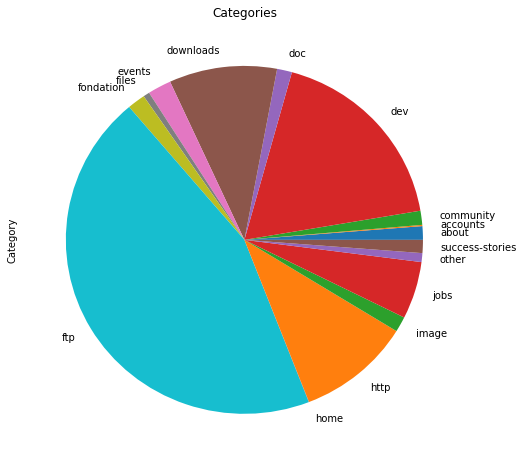

In [12]:
# Categories pie chart
urls.groupby('Category')['Category'].count().plot(kind="pie", figsize=(8,8), title='Categories')

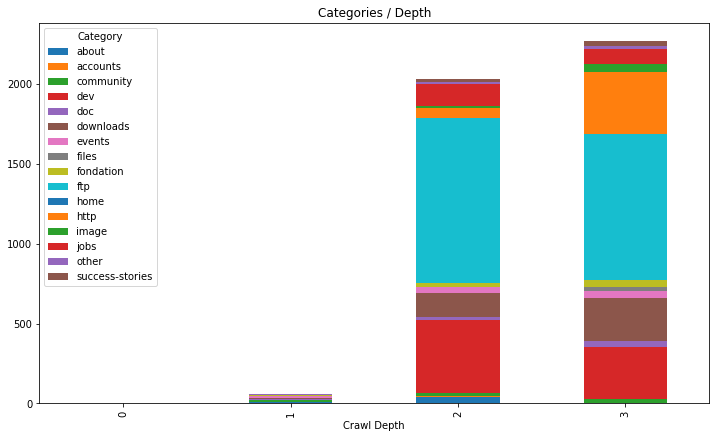

In [13]:
# Categories / Depth
urls.groupby(["Crawl Depth","Category"])['Address'].count().unstack().plot(kind="bar", figsize=(12,7), title='Categories / Depth', stacked=True)

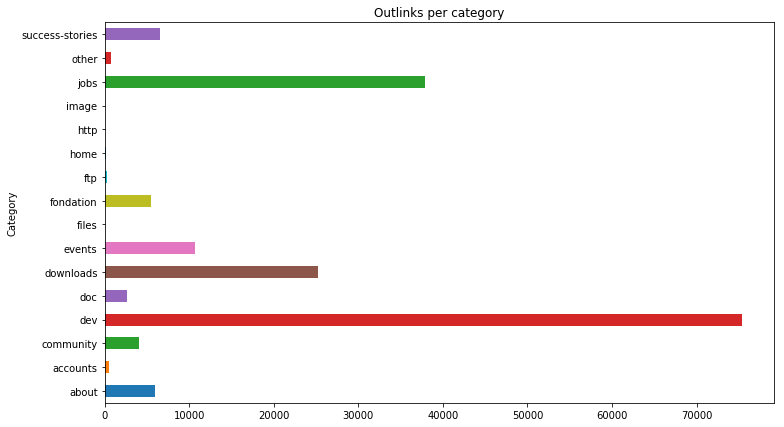

In [14]:
# Outlinks per category
urls.groupby("Category")["Outlinks"].sum().plot(kind="barh", figsize=(12,7), title="Outlinks per category")

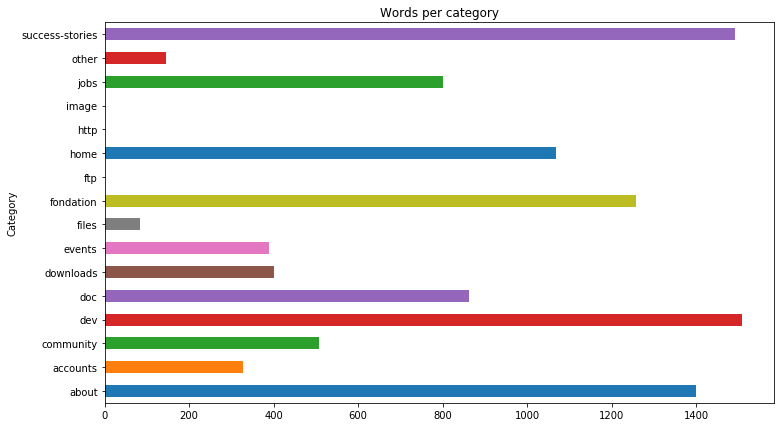

In [15]:
# Words per category
urls.groupby("Category")["Word Count"].mean().plot(kind="barh", figsize=(12,7), title="Words per category")

You could also try some more complex merging. For instance, this finds all links to 301 redirects and adds redirect URL to the table:

In [16]:
# Create a new DataFrame with 301 links
redirs = links[links["Status Code"] == 301]
# Merge with `urls` to get Redirect URI
redirs = redirs.merge(urls[urls["Status Code"] == 301][["Address","Redirect URI"]], how="left", left_on="Destination", right_on="Address")
# Drop Address column
redirs = redirs.drop("Address", axis=1)
# Show first 10 rows
redirs.head()

,Type,Source,Destination,Status Code,Redirect URI
0,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/download/alternatives,301.0,https://www.python.org/download/alternatives/
1,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/doc/av,301.0,https://www.python.org/doc/av/
2,AHREF,https://www.python.org/events/python-user-grou...,http://python.org/dev/peps/,301.0,https://python.org/dev/peps/
3,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/community/awards,301.0,https://www.python.org/community/awards/
4,AHREF,https://www.python.org/events/python-user-grou...,https://www.python.org/download/alternatives,301.0,https://www.python.org/download/alternatives/


## What now ?

Those were just a few basic examples of what you can do with a few lines of code.  
You could add data from APIs, try some Machine Learning libs, calculate internal PageRank... It's up to you now!  